In [26]:
# -*- coding: utf-8 -*-

"""
Esta funcion calcula K0 del sistema CO2-H20 segun recomienda Dickson et al 2007
Guide for best practices for ocean CO2 measurements. PICES SP 3, 191 pp.
Conforme a Weiss, R.F., Carbon dioxide in seawater: the solubility of a
non-ideal gas. Marine Chemistry 2, 203-215.
Unidades
fCO2=atm
CO2=mol*kg-soln
K0=mol*kg-soln-1*atm-1

Ejemplo de uso:
Input
K0=K0_Weiss(35, 25)
print(K0)
Output:
0.028391881804015685
"""
import numpy as np
def K0_Weiss(S, TC):
    TK=TC+273.15 #Temperatura de Celsius a Kelvin   
    lnK0 = 9345.17/TK - 60.2409 + 23.3585 * np.log(TK/100) + S * (0.023517 - 0.00023656 * TK + 4.7036e-07 * 
        TK * TK)
    K0=np.exp(lnK0) 
    return K0
    

"""
Esta funcion calcula K1 y K2 del sistema CO2-H20 segun
Roy et al., (1993), The dissociation constant of carbonic acid in sewater
at salinities of 5 to 45 and temperatures of 0 to 45 desgrees Celsius.
Marine Chemistry 44(2-4), 249-267.
Unidades
K1, K2=mol*kg-soln-1
Ejemplo de uso:
Input
K1, K2=K1_K2_Roy(35, 25)
print(K1, K2)
Output:
1.3921075396202872e-06 1.1887254858040348e-09
"""


def K1_K2_Roy(S, TC):
    TK=TC+273.15 #Temperatura de Celsius a Kelvin    
    #K1 usando Roy et al., 1993
    tmp1 = 2.83655 - 2307.1266/TK - 1.5529413 * np.log(TK)
    tmp2 = -(0.207608410 + 4.0484/TK) * np.sqrt(S)
    tmp3 = 0.08468345 * S - 0.00654208 * S**1.5
    tmp4 = np.log(1 - 0.001005 * S)
    lnK1roy = tmp1 + tmp2 + tmp3 + tmp4
    K1 = np.exp(lnK1roy)
    #K2 usando Roy et al., 1993
    tmp1 = -9.226508 - 3351.6106/TK - 0.2005743 * np.log(TK)
    tmp2 = (-0.106901773 - 23.9722/TK) * np.sqrt(S)
    tmp3 = 0.1130822 * S - 0.00846934 * S**1.5 + np.log(1 - 
        0.001005 * S)
    lnK2roy = tmp1 + tmp2 + tmp3
    K2 = np.exp(lnK2roy)
    
    return K1, K2

"""
Esta funcion calcula K1 y K2 segun Saans y Ben Yaakonv
"""
def K1_K2_SBY(S):
    pK1=6.1568-0.00352*S
    pK2=8.5503-0.0080*S
    K1=10**(-pK1)
    K2=10**(-pK2)
    return K1, K2

"""
Esta funcion calcula K0 del sistema CO2-H20 segun recomienda Dickson et al 2007
Guide for best practices for ocean CO2 measurements. PICES SP 3, 191 pp.
Conforme a Mucci, A., 1983. The solubility of calcite and aragonite in seawater
at various salinities and temperatures and one atmosphere of total pressure.
American journal of Science, 283, 780-799.

Ejemplo de uso:
Input
Ksp_a=Kspa_Mucci(35, 25)
print(Ksp_a)
Output:
6.48175906801198e-07
"""

def Kspa_Mucci(S, TC):
    TK=TC+273.15 #Temperatura de Celsius a Kelvin
    tmp1 = -171.945 - 0.077993 * TK + 2903.293/TK + 71.595 * np.log10(TK)
    tmp2 = +(-0.068393 + 0.0017276 * TK + 88.135/TK) * np.sqrt(S)
    tmp3 = -0.10018 * S + 0.0059415 * S**1.5
    log10Kspa = tmp1 + tmp2 + tmp3
    Ksp_a=10**(log10Kspa)
    return Ksp_a


"""
Created on Mon Sep  3 11:54:42 2018

@author: fergomez

Esta funcion calcula K0 del sistema CO2-H20 segun recomienda Dickson et al 2007
Guide for best practices for ocean CO2 measurements. PICES SP 3, 191 pp.
Conforme a Mucci, A., 1983. The solubility of calcite and aragonite in seawater
at various salinities and temperatures and one atmosphere of total pressure.
American journal of Science, 283, 780-799.

Ejemplo de uso:
Input
Ksp_c=Kspc_Mucci(35, 25)
print(Ksp_c)
Output:
4.2723509278626e-07
"""

def Kspc_Mucci(S, TC):
    TK=TC+273.15 #Temperatura de Celsius a Kelvin
    tmp1 = -171.9065 - 0.077993 * TK + 2839.319/TK + 71.595 * np.log10(TK)
    tmp2 = +(-0.77712 + 0.0028426 * TK + 178.34/TK) * np.sqrt(S)
    tmp3 = -0.07711 * S + 0.0041249 * S**1.5
    log10Kspc = tmp1 + tmp2 + tmp3
    Ksp_c=10**(log10Kspc)
    return Ksp_c
    
# -*- coding: utf-8 -*-
"""
Created on Mon Sep  3 11:55:56 2018
Calcula el factor de correccion de la presion para las constantes de
equilibrio Ki usando Millero, F.J., (1995). Thermodynamics of the carbon
dioxide system in the oceans. Geochimica et Cosmochimica Acta 59:661-677.
@author: fergomez

Ejemplo de uso:
A presion atmosferica Kspa=4.27 e-07
Input (para aragonita):
fcorr=P_corr_Millero(-45.96, 0.5304, 0.0, -11.76e-03, 0.3692e-03, 0.0, 25, 300)
print(fcorr)
Output:
1.4787577790538065

entonces Kspa(presion atmosferica)*fcorr=Kspa_corregido
4.27 e-07*1.4787577790538065= 9.58 e-07
"""


#pagina 186 Andreas Hoffman PhD Thesis
def P_corr_Millero(a0, a1, a2, b0, b1, b2, TC, P):
    TK=TC+273.15 #Temperatura de Celsius a Kelvin
    R=83.131
    delta_V= a0+a1*TC+a2*TC*TC
    delta_k= (b0+b1*TC+b2*TC*TC)
    lnKp=-(delta_V/(R * TK))*P+0.5*(delta_k/(R*TK))*P*P
    fcorr=np.exp(lnKp)
    return fcorr


0.030186937195564558 1.5674727518004408e-06 1.7770514423145577e-08 3.797280889512255e-06 1.0492760137266739e-05


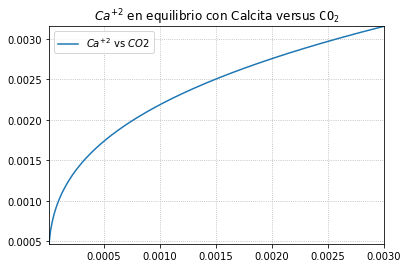

0.00047127483325169647 0.003154869019231657


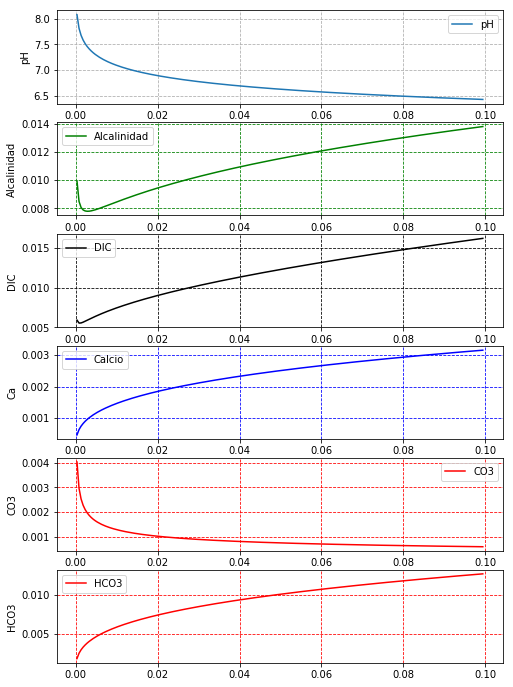

In [27]:
# -*- coding: utf-8 -*-
"""
Created on Tue Nov 20 09:40:14 2018

@author: fergomez
"""

#Aqui va el directorio donde tenemos las funciones creadas (carb_eq_ctes_PB_1982.py)
#import os
#os.chdir("/home/fergomez/Desktop/Materias y Cursos/Clases Sedimentologia y Biogeoquimica de Carbonatos/Proyecto_Estudiantes")

#Llamamos las librerias que utilizaremos
import numpy as np
#import matplotlib.pyplot as plt
import math
#from carb_eq_ctes_PB_1982 import KH_PB_82, K1_PB_82, K2_PB_82, Kspc_PB_82, Kspa_PB_82
import matplotlib.pyplot as plt
%matplotlib inline

#============================================================================
#Inicio de seccion de INPUT==================================================
#============================================================================

TC=10.0 #Celsius
S=100.0

co2=np.linspace(0.00001, 0.0030, 200)
#pco2=np.linspace(0.000001, 0.0650, 200)
#pco2=[0.000090, 0.000100, 0.000164, 0.000200, 0.000300, 0.000450, 0.000600, 0.000700, 0.000800, 0.001100] #atmosferas (para pasar de microatmosferas a atmosferas, 407*e-06)
#pco2=np.array(pco2)

K0 = K0_Weiss(S, TC)
K1, K2 = K1_K2_SBY(S)
#K1, K2 = K1_K2_Roy(S, TC)
Kspc = Kspc_Mucci(S, TC)
Kspa = Kspa_Mucci(S, TC)

print(K0, K1, K2, Kspc, Kspa)

#============================================================================
#Fin de seccion de INPUT======================================================
#============================================================================

#=============================================================================
#=============================================================================

#=============================================================================
#Funcion que realiza calculos del sistema carbonato
#=============================================================================

#def carbEq(pco2):    
#    co2=pco2*K0
#    h=(K2**(1/3)*(K0*K1)**(2/3)/(2*Kspc)**(1/3))*pco2**(2/3)
#    pH=-math.log10(h)    
#    Ca=((2*Kspc*K0*K1)**(1/3)/(4*K2**(1/3)))*pco2**(1/3)
#    co3=K0*K1*K2*pco2/h**2
#    hco3=K0*K1*pco2/h    
#    fco2=co2/K0    
#    alk=2*co3+hco3
#    dic=co2+co3+hco3
    #Saturacion de Calcita y Aragonita
#    omega_ar=Ca*co3/Kspa
#    omega_cal=Ca*co3/Kspc
    
#    return fco2, Ca, pH, co2, hco3, co3, h, dic, alk, omega_ar, omega_cal

def carbEq(co2):    
    pco2=co2/K0
    h=(K2**(1/3)*(K0*K1)**(2/3)/(2*Kspc)**(1/3))*pco2**(2/3)
    pH=-math.log10(h)    
    Ca=((2*Kspc*K0*K1)**(1/3)/(4*K2**(1/3)))*pco2**(1/3)
    co3=K0*K1*K2*pco2/h**2
    hco3=K0*K1*pco2/h    
    fco2=co2/K0    
    alk=2*co3+hco3
    dic=co2+co3+hco3
    #Saturacion de Calcita y Aragonita
    omega_ar=Ca*co3/Kspa
    omega_cal=Ca*co3/Kspc
    
    return fco2, Ca, pH, co2, pco2, hco3, co3, h, dic, alk, omega_ar, omega_cal

vcarbEq = np.vectorize(carbEq)
#=============================================================================
#Uso de la funcion - ejemplo
#=============================================================================
#fco2, Ca, pH, co2, hco3, co3, h, dic, alk, omega_ar, omega_cal=vcarbEq(pco2)
fco2, Ca, pH, co2, pco2, hco3, co3, h, dic, alk, omega_ar, omega_cal=vcarbEq(co2)


plt.plot(co2, Ca, label='$Ca^{+2}$ vs $CO2$')

plt.title(r'$Ca^{+2}$ en equilibrio con Calcita versus $\mathtt{CO_2}$', fontsize=12)
plt.ylim(np.min(Ca), np.max(Ca))
plt.xlim(np.min(co2), np.max(co2))
plt.grid(linestyle='dotted')
plt.legend()
plt.savefig('co2_versus_Calcio_eq.pdf')
plt.show()

print(np.min(Ca), np.max(Ca))



fig, ax=plt.subplots(6, 1, figsize=(8, 12))
ax[0].plot(pco2, pH, label="pH")
ax[1].plot(pco2, alk, color="green", label="Alcalinidad")
ax[2].plot(pco2, dic, color="black", label="DIC")
ax[3].plot(pco2, Ca, color="blue", label="Calcio")
ax[4].plot(pco2, co3, color="red", label="CO3")
ax[5].plot(pco2, hco3, color="red", label="HCO3")

ax[0].set_ylabel("pH")
ax[1].set_ylabel("Alcalinidad")
ax[2].set_ylabel("DIC")
ax[3].set_ylabel("Ca")
ax[4].set_ylabel("CO3")
ax[5].set_ylabel("HCO3")

ax[0].grid(linestyle='--')
ax[1].grid(color='green',linestyle='--')
ax[2].grid(color='black',linestyle='--')
ax[3].grid(color='blue',linestyle='--')
ax[4].grid(color='red',linestyle='--')
ax[5].grid(color='red',linestyle='--')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
ax[5].legend()
plt.savefig('co2_versus_all_eq.pdf')
plt.show()



# Probando log axis

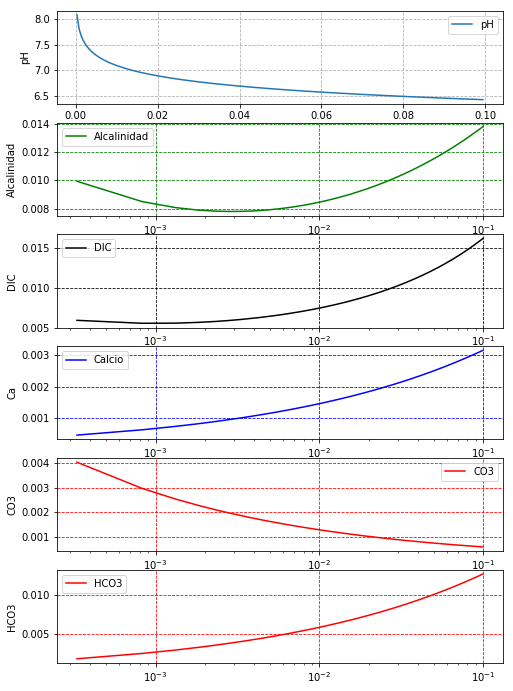

In [28]:
fig, ax=plt.subplots(6, 1, figsize=(8, 12))
ax[0].plot(pco2, pH, label="pH")
ax[1].semilogx(pco2, alk, color="green", label="Alcalinidad")
ax[2].semilogx(pco2, dic, color="black", label="DIC")
ax[3].semilogx(pco2, Ca, color="blue", label="Calcio")
ax[4].semilogx(pco2, co3, color="red", label="CO3")
ax[5].semilogx(pco2, hco3, color="red", label="HCO3")



ax[0].set_ylabel("pH")
ax[1].set_ylabel("Alcalinidad")
ax[2].set_ylabel("DIC")
ax[3].set_ylabel("Ca")
ax[4].set_ylabel("CO3")
ax[5].set_ylabel("HCO3")

ax[0].grid(linestyle='--')
ax[1].grid(color='green',linestyle='--')
ax[2].grid(color='black',linestyle='--')
ax[3].grid(color='blue',linestyle='--')
ax[4].grid(color='red',linestyle='--')
ax[5].grid(color='red',linestyle='--')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
ax[5].legend()

In [29]:

print(min(co2), max(co2))

1e-05 0.003


In [30]:
print(K0)

0.030186937195564558


In [31]:
co2_Beeler=np.array([0.000285459, 0.000122688, 0.000106745, 7.82E-05, 8.98E-05, 4.90E-05, 0.000174894, 1.38E-05, 1.63E-06, 7.82E-07, 5.80E-05, 7.52E-05, 0.000204675, 9.38E-05, 4.57E-05, 1.22E-06])
pco2_Beeler=K0*co2_Beeler
alk_Beeler=np.array([0.0305981, 0.0263963, 0.0231975, 0.0112978, 0.00819828, 0.00659751, 0.00509924, 0.00629997, 0.00619997, 0.00309964, 0.00819827, 0.0102979, 0.0230985, 0.00879715, 0.00759693, 0.00389996])



In [32]:
DIC_Beeler=np.array([0.0250, 0.0198, 0.0175, 0.0088, 0.0066, 0.0051, 0.0047, 0.0036, 0.0032, 0.0016, 0.0059, 0.0081, 0.0165, 0.0070, 0.0057, 0.0020])

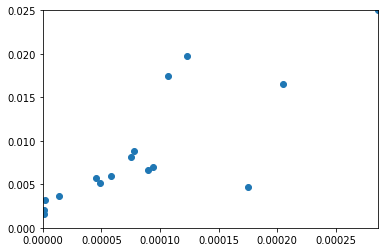

In [33]:

plt.scatter(co2_Beeler, DIC_Beeler)
plt.xlim(0, max(co2_Beeler))
plt.ylim(0, max(DIC_Beeler))
plt.show()


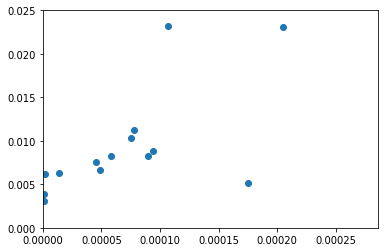

In [34]:
plt.scatter(co2_Beeler, alk_Beeler)
plt.xlim(0, max(co2_Beeler))
plt.ylim(0, max(DIC_Beeler))
plt.show()

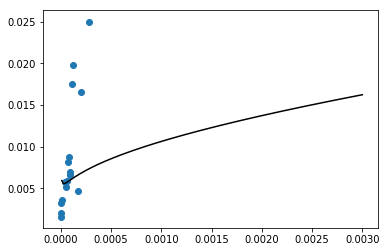

In [35]:

plt.plot(co2, dic, color="black", label="DIC")
plt.scatter(co2_Beeler, DIC_Beeler)
#plt.xlim(0, 0.00005)
#plt.ylim(0, 0.010)
plt.show()


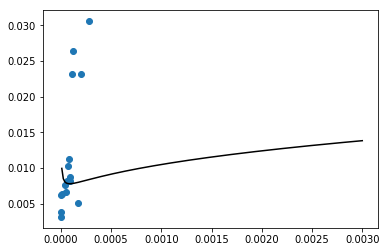

In [36]:
plt.plot(co2, alk, color="black")
plt.scatter(co2_Beeler, alk_Beeler)
#plt.xlim(0, 0.00005)
#plt.ylim(0, 0.010)
plt.show()

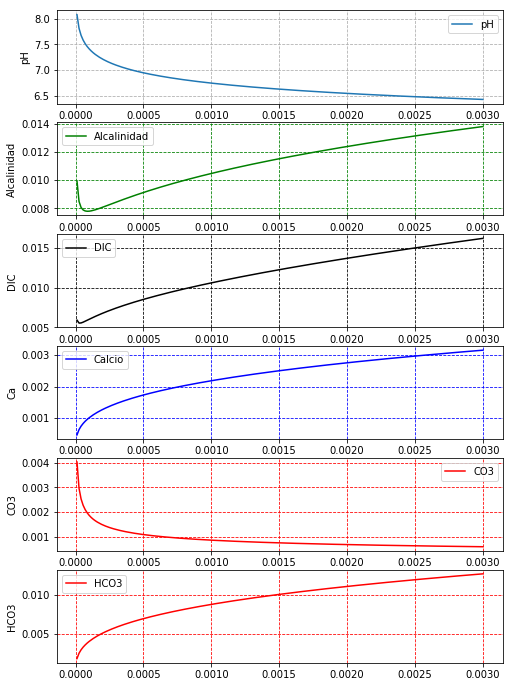

In [37]:
pH_data=np.array([5.7, 5.61, 7.71, 6.5, 6.01, 7.87, 7.84, 7.46, 7.52, 5.84, 5.7, 6.88])

co2_data=np.array([0.0017, 0.0028, 0.0002, 0.0009, 0.0015, 0.0001, 0.0001, 0.0001, 0.0001, 0.0016, 0.0007, 0.0001])


fig, ax=plt.subplots(6, 1, figsize=(8, 12))
#ax[0].scatter(co2_data, pH_data)
ax[0].plot(co2, pH, label="pH")
ax[1].plot(co2, alk, color="green", label="Alcalinidad")
ax[2].plot(co2, dic, color="black", label="DIC")
ax[3].plot(co2, Ca, color="blue", label="Calcio")
ax[4].plot(co2, co3, color="red", label="CO3")
ax[5].plot(co2, hco3, color="red", label="HCO3")

ax[0].set_ylabel("pH")
ax[1].set_ylabel("Alcalinidad")
ax[2].set_ylabel("DIC")
ax[3].set_ylabel("Ca")
ax[4].set_ylabel("CO3")
ax[5].set_ylabel("HCO3")

ax[0].grid(linestyle='--')
ax[1].grid(color='green',linestyle='--')
ax[2].grid(color='black',linestyle='--')
ax[3].grid(color='blue',linestyle='--')
ax[4].grid(color='red',linestyle='--')
ax[5].grid(color='red',linestyle='--')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
ax[5].legend()
#plt.savefig('co2_versus_all_eq.pdf')
plt.show()

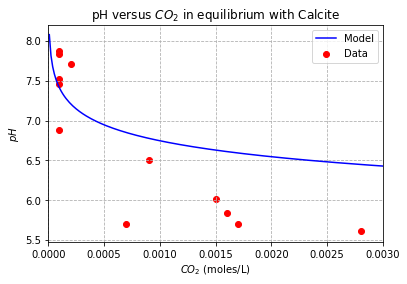

In [38]:
pH_data=np.array([5.7, 5.61, 7.71, 6.5, 6.01, 7.87, 7.84, 7.46, 7.52, 5.84, 5.7, 6.88])

co2_data=np.array([0.0017, 0.0028, 0.0002, 0.0009, 0.0015, 0.0001, 0.0001, 0.0001, 0.0001, 0.0016, 0.0007, 0.0001])


plt.scatter(co2_data, pH_data, label="Data", color='red')
plt.plot(co2, pH, label="Model",  color='blue')
plt.xlim(0.0, 0.003)
plt.title('pH versus $CO_2$ in equilibrium with Calcite')
plt.legend()
plt.xlabel('$CO_2$ (moles/L)')
plt.ylabel('$pH$')
plt.grid(linestyle='--')
plt.savefig('pH_vs_Co2_Calcite')

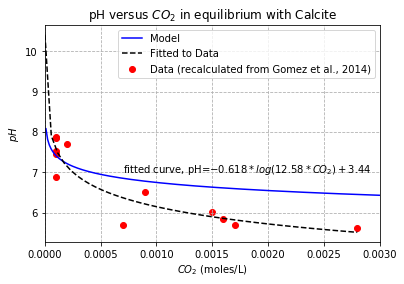

In [39]:

from scipy.optimize import curve_fit

def func(x):
  #return a*np.exp(-b*x)+c
  return -0.61789773 * np.log(12.58663455 * x) + 3.44256215


pH_data=np.array([5.7, 5.61, 7.71, 6.5, 6.01, 7.87, 7.84, 7.46, 7.52, 5.84, 5.7, 6.88])

co2_data=np.array([0.0017, 0.0028, 0.0002, 0.0009, 0.0015, 0.0001, 0.0001, 0.0001, 0.0001, 0.0016, 0.0007, 0.0001])



plt.plot(co2, pH, label="Model",  color='blue')
plt.scatter(co2_data, pH_data, label="Data (recalculated from Gomez et al., 2014)", color='red')
plt.xlim(0.0, 0.003)
plt.title('pH versus $CO_2$ in equilibrium with Calcite')

plt.xlabel('$CO_2$ (moles/L)')
plt.ylabel('$pH$')
plt.grid(linestyle='--')
plt.savefig('pH_vs_Co2_Calcite')


x = np.linspace(0.000001, max(co2_data), 50)   # changed boundary conditions to avoid division by 0


y = func(x)
plt.plot(x, y, color='k', label='Fitted to Data', linestyle='--')

plt.text(0.0007, 7, 'fitted curve, pH=$-0.618*log(12.58 * CO_2) + 3.44$')
plt.legend()
plt.savefig('pH_co2_data_model_fit.pdf', dpi=200)
plt.show()



## probandp 3 varianles

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log


[-0.58254342 61.5438747   4.51708051]


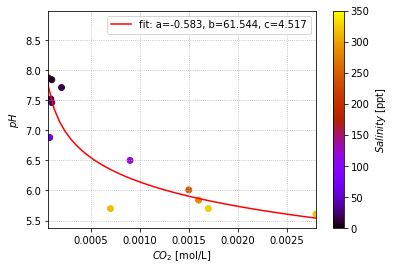

In [53]:
import matplotlib.pyplot as plt
import numpy as np
# Aca elegimos el tipo de colormap (gnuplot)
cm = plt.cm.get_cmap('gnuplot')

from scipy.optimize import curve_fit

CO2_data=np.array([0.0017, 0.0028, 0.0002, 0.0009, 0.0015, 6.37e-5, 0.0001, 0.0001, 9.05e-5, 0.0016, 0.0007, 8.0e-5])
pH_data=np.array([5.7, 5.61, 7.71, 6.5, 6.01, 7.87, 7.84, 7.46, 7.52, 5.84, 5.7, 6.88])
S_data=np.array([324.8, 316.8, 16.3, 120, 246.8, 15.4, 9.1, 27.4, 22.1, 285.6, 316.4, 62.8])
DIC_data=np.array([0.0147, 0.0173, 0.0096, 0.0065, 0.0113, 0.0048, 0.0073, 0.0036, 0.0029, 0.0124, 0.0057, 0.0008])
Alk_data=np.array([0.0176, 0.0186, 0.0110, 0.0060, 0.0120, 0.0058, 0.0086, 0.0040, 0.0032, 0.0138, 0.0066, 0.0008])


plt.grid(linestyle='dotted')
# generamos el grafico
sc = plt.scatter(CO2_data, pH_data, c=S_data, vmin=0,
vmax=350, s=35, cmap=cm)

#plt.plot(CO2_fit, pH_fit)

#==============================
def func(x, a, b, c):
  #return a*np.exp(-b*x)+c
  return a * np.log(b * x) + c

x = np.linspace(1e-5,max(CO2_data), 50)   # changed boundary conditions to avoid division by 0

popt, pcov = curve_fit(func, CO2_data, pH_data, maxfev = 100)
print(popt)
y = func(x, *popt)
#==============================

#plt.plot(co2, pH, label="Model",  color='blue')
plt.plot(x, y, 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

# agregamos detalles y guardamos
plt.xlabel(r'$CO_2$ [mol/L]')
plt.ylabel(r'$pH$')
plt.xlim(min(CO2_data), max(CO2_data))
plt.colorbar(sc, label=r'$Salinity$ [ppt]')
plt.legend()
#plt.savefig('pH_CO2_S_fitted.pdf', dpi=200)
plt.show()

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log


[-0.58254342 61.5438747   4.51708051]


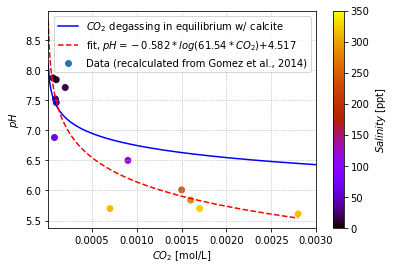

In [61]:
import matplotlib.pyplot as plt
import numpy as np
# Aca elegimos el tipo de colormap (gnuplot)
cm = plt.cm.get_cmap('gnuplot')

from scipy.optimize import curve_fit

CO2_data=np.array([0.0017, 0.0028, 0.0002, 0.0009, 0.0015, 6.37e-5, 0.0001, 0.0001, 9.05e-5, 0.0016, 0.0007, 8.0e-5])
pH_data=np.array([5.7, 5.61, 7.71, 6.5, 6.01, 7.87, 7.84, 7.46, 7.52, 5.84, 5.7, 6.88])
S_data=np.array([324.8, 316.8, 16.3, 120, 246.8, 15.4, 9.1, 27.4, 22.1, 285.6, 316.4, 62.8])
DIC_data=np.array([0.0147, 0.0173, 0.0096, 0.0065, 0.0113, 0.0048, 0.0073, 0.0036, 0.0029, 0.0124, 0.0057, 0.0008])
Alk_data=np.array([0.0176, 0.0186, 0.0110, 0.0060, 0.0120, 0.0058, 0.0086, 0.0040, 0.0032, 0.0138, 0.0066, 0.0008])


plt.grid(linestyle='dotted')
# generamos el grafico
sc = plt.scatter(CO2_data, pH_data, c=S_data, vmin=0,
vmax=350, s=35, cmap=cm, label="Data (recalculated from Gomez et al., 2014)")

#plt.plot(CO2_fit, pH_fit)

#==============================
def func(x, a, b, c):
  #return a*np.exp(-b*x)+c
  return a * np.log(b * x) + c

x = np.linspace(1e-5,max(CO2_data), 200)   # changed boundary conditions to avoid division by 0

popt, pcov = curve_fit(func, CO2_data, pH_data, maxfev = 100)
print(popt)
y = func(x, *popt)
#==============================

plt.plot(co2, pH, label="$CO_2$ degassing in equilibrium w/ calcite",  color='blue')
#plt.plot(x, y, 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(x, y, 'r-', label='fit, $pH=-0.582*log(61.54*CO_2$)+4.517', linestyle='--')


# agregamos detalles y guardamos
plt.xlabel(r'$CO_2$ [mol/L]')
plt.ylabel(r'$pH$')
plt.xlim(min(co2), max(co2))
plt.colorbar(sc, label=r'$Salinity$ [ppt]')
plt.legend()
plt.savefig('pH_CO2_S_fitted_and_Model.pdf', dpi=200)
plt.show()

In [42]:
print(co2)

[1.00000000e-05 2.50251256e-05 4.00502513e-05 5.50753769e-05
 7.01005025e-05 8.51256281e-05 1.00150754e-04 1.15175879e-04
 1.30201005e-04 1.45226131e-04 1.60251256e-04 1.75276382e-04
 1.90301508e-04 2.05326633e-04 2.20351759e-04 2.35376884e-04
 2.50402010e-04 2.65427136e-04 2.80452261e-04 2.95477387e-04
 3.10502513e-04 3.25527638e-04 3.40552764e-04 3.55577889e-04
 3.70603015e-04 3.85628141e-04 4.00653266e-04 4.15678392e-04
 4.30703518e-04 4.45728643e-04 4.60753769e-04 4.75778894e-04
 4.90804020e-04 5.05829146e-04 5.20854271e-04 5.35879397e-04
 5.50904523e-04 5.65929648e-04 5.80954774e-04 5.95979899e-04
 6.11005025e-04 6.26030151e-04 6.41055276e-04 6.56080402e-04
 6.71105528e-04 6.86130653e-04 7.01155779e-04 7.16180905e-04
 7.31206030e-04 7.46231156e-04 7.61256281e-04 7.76281407e-04
 7.91306533e-04 8.06331658e-04 8.21356784e-04 8.36381910e-04
 8.51407035e-04 8.66432161e-04 8.81457286e-04 8.96482412e-04
 9.11507538e-04 9.26532663e-04 9.41557789e-04 9.56582915e-04
 9.71608040e-04 9.866331

In [43]:
print(pH)

[8.08013424 7.81455006 7.67839741 7.58616259 7.51632015 7.46009402
 7.41303142 7.37255988 7.33705802 7.30543773 7.27693328 7.25098531
 7.22717275 7.20517072 7.18472323 7.16562503 7.14770903 7.13083736
 7.11489494 7.09978474 7.08542416 7.07174233 7.05867797 7.04617774
 7.03419494 7.02268843 7.01162178 7.00096261 6.99068196 6.98075388
 6.97115498 6.96186412 6.95286217 6.94413167 6.93565675 6.92742287
 6.91941668 6.91162594 6.90403936 6.8966465  6.88943772 6.88240407
 6.87553725 6.86882953 6.8622737  6.85586303 6.84959123 6.84345241
 6.83744106 6.83155199 6.82578031 6.82012145 6.81457107 6.8091251
 6.80377967 6.79853115 6.79337608 6.7883112  6.78333339 6.77843972
 6.7736274  6.76889375 6.76423625 6.75965249 6.75514017 6.7506971
 6.74632118 6.74201041 6.73776289 6.73357678 6.72945033 6.72538187
 6.72136978 6.71741253 6.71350865 6.7096567  6.70585532 6.70210321
 6.6983991  6.69474179 6.69113009 6.6875629  6.68403912 6.68055771
 6.67711767 6.67371802 6.67035783 6.66703618 6.66375222 6.660505